In [1]:
# Load the extension
%load_ext autoreload
# Autoreload all modules
%autoreload 2

In [9]:
import numpy as np
import os
from tqdm import tqdm
import time

from funcs import Find_Peaks, Thresh, find_basis, distance_from_vect, points_along_vect, peaks_to_mode, \
                    Find_mode, test_consistency, case1_m_0, case2_0_n, case3_m_n, Find_mode2
%matplotlib inline

In [ ]:
# def Find_Peaks(IMG, separation=1, Sigma=0.5, show_ada_thresh=False, show_fig=False):
#     if show_ada_thresh: image_max = ndi.maximum_filter(IMG, size=separation, mode='constant')
#     Smooth_img = gaussian(IMG,  sigma=Sigma)
#     coordinates = peak_local_max(Smooth_img, min_distance=separation)
#     coordinates = np.array(coordinates)
#     dummy = coordinates[:,0].copy()
#     coordinates[:,0] = coordinates[:,1]
#     coordinates[:,1] = dummy
#     if show_fig:
#         plt.figure()
#         plt.imshow(Smooth_img, cmap=plt.cm.gray)
#         plt.colorbar()
#         plt.plot(coordinates[:, 0],
#                  coordinates[:, 1], 'r*')
#     if show_ada_thresh:
#         plt.figure()
#         plt.imshow(image_max, cmap=plt.cm.gray)
#         plt.colorbar()
#     return coordinates

# def Thresh(IMG1, thresh=0.5):
#     IMG = IMG1.copy()
#     IMG[IMG < thresh*IMG.max()] = 0.
#     return IMG

# # get the basis vectors
# def find_basis(P0, P1):
#     Basis_vect = np.array(P1-P0, dtype='d')
#     Basis_vect /= float(np.sqrt(Basis_vect[0]**2. + Basis_vect[1]**2.))
#     # slope
#     slope = (P1[1]-P0[1])
#     slope /= (P1[0]-P0[0])
#     return Basis_vect, slope

# def distance_from_vect(vect, Point):
#     m = vect[1] / vect[0]
#     if np.isinf(m) or np.isnan(m):
#         m = 1e2
#     return (Point[1] - m*Point[0]) / np.sqrt(m**2+1)

# def points_along_vect(P_corner, Basis, Points, width):
#     # Perpendicular distance
#     d = []
#     for point in Points:
#         # (point-P_corner) to translate P_corner to origin
#         d.append(abs(distance_from_vect(Basis, point-P_corner)))
#     d = np.array(d)
#     return len(d[d<width])

# def peaks_to_mode(Peak_corner, Peaks, Width, Basis1, slope1, Basis2=[], slope2=None):
#     # ensure that the basis vects have at least pi/4 angle between them
#     if not bool(len(Basis2)) and not slope2:
#         m = points_along_vect(Peak_corner, Basis1, Peaks, Width)
#         n = 1
#     elif (abs(np.arctan(slope1) - np.arctan(slope2)) < np.pi/4.):
#         m = points_along_vect(Peak_corner, Basis1, Peaks, Width)
#         n = 1
#     else:
#         m = points_along_vect(Peak_corner, Basis1, Peaks, Width)
#         n = points_along_vect(Peak_corner, Basis2, Peaks, Width)
#     if abs(slope1) < 1.:
#         return (m-1,n-1)
#     else:
#         return (n-1,m-1)

# def Find_mode(img_loc, separation=1, Sigma=0.5, Width=10, thresh=0.5, Show_ada_thresh=False, Show_fig=True, corner=0, show_peaks=False):
#     # Read image
#     img = 255 - imageio.imread(img_loc)
#     # thresholding and smoothing image to find peaks
#     img1 = Thresh(img, thresh)
#     peaks = Find_Peaks(img1, separation=separation, Sigma=Sigma, show_ada_thresh=Show_ada_thresh, show_fig=Show_fig)
#     if len(peaks) == 1:
#         return (0,0)
#     # corner point
#     if corner==0:
#         i_corner = peaks[:,0].argmin()
#     elif corner==1:
#         i_corner = peaks[:,0].argmax()
#     elif corner==2:
#         i_corner = peaks[:,1].argmin()
#     elif corner==3:
#         i_corner = peaks[:,1].argmax()
#     peak_corner = peaks[i_corner]
#     # distances from corner point
#     d = np.array([((peaks[i,0]-peak_corner[0])**2 + (peaks[i,1]-peak_corner[1])**2) for i in range(len(peaks[:,0]))])
#     d[d==0] = d.max() + 1.
#     # catch compact basis vectors
#     i_near1 = d.argmin()
#     peak_near1 = peaks[i_near1]
#     # constructing unit vect and slope
#     basis1, m1 = find_basis(peak_corner, peak_near1)
#     if len(peaks) > 2:
#         d[i_near1] = d.max() + 1.
#         i_near2 = d.argmin()
#         peak_near2 = peaks[i_near2]
#         # print(peak_corner, peak_near1, peak_near2)
#         # constructing unit vect and slope
#         basis2, m2 = find_basis(peak_corner, peak_near2)
#         # print(basis1, basis2, m1, m2)
#         if show_peaks:
#             kk = 4
#             plt.plot([peak_corner[0], peak_corner[0]+(peak_near1[0]-peak_corner[0])*kk], 
#                      [peak_corner[1], peak_corner[1]+(peak_near1[1]-peak_corner[1])*kk], 'r')
#             plt.plot([peak_corner[0], peak_corner[0]+(peak_near2[0]-peak_corner[0])*kk], 
#                      [peak_corner[1], peak_corner[1]+(peak_near2[1]-peak_corner[1])*kk], 'y')
#     # find mode
#     if len(peaks) == 2:
#         mode = peaks_to_mode(peak_corner, peaks, Width, basis1, m1)
#     else:
#         mode = peaks_to_mode(peak_corner, peaks, Width, basis1, m1, basis2, m2)
#     print(mode)
#     if (mode[0]+1)*(mode[1]+1) < len(peaks):
#         print('Warning: Something went wrong! \nNumber of peaks ({}) \
#         inferred from mode does not match with actual number of peaks({})'.format((mode[0]+1)*(mode[1]+1), len(peaks)))
#         corner += 1
#         if corner < 4:
#             mode = Find_mode(img_loc, separation1=separation1, Sigma1=Sigma1, Width=Width, thresh=thresh, 
#                              Show_ada_thresh=Show_ada_thresh, Show_fig=Show_fig, corner=corner, show_peaks=show_peaks)
#             print(mode)
#         else:
#             pass
#     plt.show()
#     return mode

In [3]:
# image dimension (n_pixl x n_pixl)
n_pixl=128
RepoDir = '/home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/'
TrainingDataFolder = RepoDir + 'Data/TrainingData/'
SaveModelFolder = RepoDir + 'Data/TrainedModels/'

In [4]:
files = os.listdir(TrainingDataFolder)
for file in files:
    if file[-3:] != 'png':
        files.remove(file)

In [27]:
TrueLabels = []
# We have grayscale images, so while loading the images we will keep grayscale=True, 
# if you have RGB images, you should set grayscale as False
Image_Locations = []
for file in tqdm(files):
    if file[:2] == 'LG':
        continue
    # training images
    Image_Locations.append(TrainingDataFolder+file)
    # target labels
    TrueLabels.append(tuple(map(int, file.split('_')[1:3])))

# Image_Locations = np.array(Image_Locations)
# TrueLabels = np.array(TrueLabels)


100%|██████████| 24423/24423 [00:00<00:00, 1125031.43it/s]


In [ ]:
# Y = np.array(Labels)
# Label_enc = LabelEncoder()
# Y = Label_enc.fit_transform(Y)
# Y = Y.reshape(len(Y), 1)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# Y = onehot_encoder.fit_transform(Y)
# Y.shape
# # Collect the encoders in a dict to save later
# Encoder = {'one_hot_enc': onehot_encoder, 'label_enc': Label_enc}

### Testing

In [13]:
start = time.time()
PredictLabels = []
i = 0
for loc in tqdm(Image_Locations):
    print(i, loc[-14:-11])
    PredictLabels.append(Find_mode2(loc, separation1=5, Show_fig=False))
    i += 1
end = time.time()
print(end - start)

  0%|          | 53/12217 [00:00<00:23, 524.83it/s]

0 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
1 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
2 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
3 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
4 3_3
Case1 result:  (3, 0)
Number of peaks (4)     

  1%|▏         | 162/12217 [00:00<00:22, 527.81it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
112 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
113 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
114 2_0
Case1 result:  (2, 0)
115 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
116 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0

  2%|▏         | 286/12217 [00:00<00:21, 567.07it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
225 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
226 1_0
Case1 result:  (1, 0)
227 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
228 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
229 4_1
Case1 result:  (

  3%|▎         | 409/12217 [00:00<00:20, 589.55it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
346 2_0
Case1 result:  (2, 0)
347 4_0
Case1 result:  (4, 0)
348 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
349 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
350 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner

  4%|▍         | 534/12217 [00:00<00:19, 603.63it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 4)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
471 _1_
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
472 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
473 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
474 4_3
Case1 result:  (4, 0)
Number of peaks (5)   

  5%|▌         | 656/12217 [00:01<00:19, 598.58it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 1)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
596 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
597 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
598 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
599 _0_
Case0:  (0, 0)
600 _3_
Case1 result:  (3, 0)
601 2_0
Case1 result:  (2, 0)
602 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
603 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode

  6%|▋         | 773/12217 [00:01<00:19, 578.98it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
711 _2_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 4)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
712 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(11)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(11)
Case3 corner_0 result:  (1, 3)
Number of peaks (8)         inferred from mode does not match with actual number of peaks(11)
Case3 corner_1 result:  (1, 3)
Number of peaks (8)         inferred from mode does not match with actua

  7%|▋         | 892/12217 [00:01<00:19, 583.78it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
826 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
827 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
828 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does n

  8%|▊         | 1012/12217 [00:01<00:18, 590.80it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
947 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
948 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
949 _0_
Case0:  (0, 0)
950 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
951 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number o

  9%|▉         | 1134/12217 [00:01<00:18, 596.94it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
1068 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
1069 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
1070 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 2)
Number of peaks (3)         inferred from mode do

 10%|█         | 1254/12217 [00:02<00:18, 587.67it/s]

Case0:  (0, 0)
1186 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
1187 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
1188 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
1189 HG_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)        

 11%|█         | 1374/12217 [00:02<00:18, 588.80it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 7)
Number of peaks (8)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
1303 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
1304 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(11)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(11)
Case3 corner_0 result:  (3, 3)
1305 _4_
Case1 result:  (4, 0)
1306 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks 

 12%|█▏        | 1495/12217 [00:02<00:17, 595.67it/s]

Case3 corner_0 result:  (4, 2)
1423 2_0
Case1 result:  (2, 0)
1424 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 5)
Number of peaks (6)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
1425 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
1426 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
1427 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)

 13%|█▎        | 1616/12217 [00:02<00:17, 598.56it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
1543 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
1544 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
1545 1_0
Case1 result:  (1, 0)
1546 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
1547 4_0
Case1 result:  (4, 0)
1548 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
1549 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match 

 14%|█▍        | 1735/12217 [00:02<00:19, 537.44it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
1662 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
1663 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
1664 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode do

 15%|█▌        | 1845/12217 [00:03<00:19, 527.12it/s]

Case1 result:  (2, 0)
1756 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
1757 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(19)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(19)
Case3 corner_0 result:  (6, 3)
1758 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
1759 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
1760 3_3
Case1 res

 16%|█▌        | 1958/12217 [00:03<00:18, 541.91it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
1864 3_0
Case1 result:  (3, 0)
1865 2_0
Case1 result:  (2, 0)
1866 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
1867 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (5, 3)
1868 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 res

 17%|█▋        | 2072/12217 [00:03<00:18, 553.20it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
1975 2_0
Case1 result:  (2, 0)
1976 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
1977 1_0
Case1 result:  (1, 0)
1978 3_0
Case1 result:  (3, 0)
1979 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
1980 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with ac

 18%|█▊        | 2197/12217 [00:03<00:17, 586.13it/s]

Case1 result:  (2, 0)
2092 0_0
Case0:  (0, 0)
2093 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
2094 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
2095 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
2096 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  

 19%|█▉        | 2315/12217 [00:04<00:17, 578.41it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
2214 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (3, 1)
Number of peaks (8)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_1 result:  (4, 1)
2215 1_0
Case1 result:  (1, 0)
2216 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
2217 2_3
Case1 result:  (2, 0)
Number of

 20%|█▉        | 2434/12217 [00:04<00:16, 579.95it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
2328 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 8)
Number of peaks (9)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
2329 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
2330 2_0
Case1 result:  (2, 0)
2331 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks

 21%|██        | 2553/12217 [00:04<00:16, 585.74it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
2444 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
2445 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(19)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(19)
Case3 corner_0 result:  (2, 6)
2446 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (3, 1)
Number of peaks (8)         inferred from

 22%|██▏       | 2671/12217 [00:04<00:16, 573.51it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
2564 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
2565 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
2566 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does n

 23%|██▎       | 2790/12217 [00:04<00:16, 580.69it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
2677 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 2)
2678 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
2679 4_0
Case1 result:  (4, 0)
2680 3_0
Case1 result:  (3, 0)
2681 2_0
Case1 result:  (2, 0)
2682 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actua

 24%|██▍       | 2909/12217 [00:05<00:15, 587.40it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 1)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
2795 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
2796 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
2797 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does

 25%|██▍       | 3029/12217 [00:05<00:15, 592.20it/s]

Case1 result:  (4, 0)
2914 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
2915 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
2916 4_0
Case1 result:  (4, 0)
2917 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
2918 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 res

 25%|██▌       | 3089/12217 [00:05<00:15, 578.55it/s]

Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
3035 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(17)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(17)
Case3 corner_0 result:  (5, 3)
3036 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
3037 0_0
Case1 result:  (0, 1)
3038 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
3039 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0,

 26%|██▌       | 3206/12217 [00:05<00:15, 568.08it/s]

Case3 corner_0 result:  (1, 1)
3143 _1_
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
3144 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
3145 4_0
Case1 result:  (4, 0)
3146 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
3147 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corne

 27%|██▋       | 3323/12217 [00:05<00:15, 568.39it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (6, 3)
3261 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
3262 1_0
Case1 result:  (1, 0)
3263 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
3264 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks 

 28%|██▊       | 3442/12217 [00:05<00:15, 578.76it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
3376 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
3377 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
3378 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode d

 29%|██▉       | 3558/12217 [00:06<00:15, 550.64it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
3495 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
3496 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
3497 1_0
Case1 result:  (1, 0)
3498 4_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(14)
Case2 result:  (0, 0)
Number of peaks

 30%|███       | 3675/12217 [00:06<00:16, 530.99it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
3585 _1_
Case1 result:  (0, 2)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
3586 0_0
Case0:  (0, 0)
3587 3_0
Case1 result:  (3, 0)
3588 2_0
Case1 result:  (2, 0)
3589 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 5)
3590 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual numb

 31%|███       | 3790/12217 [00:06<00:15, 549.00it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
3700 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
3701 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
3702 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
3703 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)

 32%|███▏      | 3907/12217 [00:06<00:15, 551.46it/s]

Case2 result:  (0, 1)
3810 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
3811 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
3812 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
3813 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
3814 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0,

 33%|███▎      | 4023/12217 [00:07<00:14, 561.24it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
3923 G_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
3924 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
3925 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
3926 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         i

 34%|███▍      | 4147/12217 [00:07<00:13, 586.86it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
4039 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
4040 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
4041 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode

 35%|███▍      | 4268/12217 [00:07<00:13, 589.95it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
4163 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
4164 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
4165 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
4166 0_0
Case0:  (0, 0)
4167 3_1
Case1 result: 

 36%|███▌      | 4387/12217 [00:07<00:13, 573.41it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
4280 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
4281 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
4282 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
4283 4_2
Case1 result:  (4, 0)
Number of peaks (5

 37%|███▋      | 4513/12217 [00:07<00:12, 598.81it/s]

Case2 result:  (0, 4)
4392 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
4393 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
4394 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
4395 _0_
Case0:  (0, 0)
4396 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 2)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
4397 1_0
Case1 result:  (1, 0)
4398 1_0
Case1 result:  (1, 0)
4399 3_4
Case1 result:  (3, 0)
Number of peaks (4)         i

 38%|███▊      | 4639/12217 [00:08<00:12, 611.59it/s]

Case3 corner_0 result:  (2, 3)
4518 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (3, 2)
4519 0_0
Case0:  (0, 0)
4520 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
4521 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
4522 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 re

 39%|███▉      | 4763/12217 [00:08<00:12, 605.17it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
4643 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
4644 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
4645 3_0
Case1 result:  (3, 0)
4646 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks 

 39%|███▉      | 4824/12217 [00:08<00:12, 597.43it/s]

4763 _3_
Case1 result:  (0, 1)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
4764 2_0
Case1 result:  (2, 0)
4765 2_0
Case1 result:  (2, 0)
4766 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
4767 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
4768 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)


 40%|████      | 4947/12217 [00:08<00:12, 595.48it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
4885 3_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(18)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(18)
Case3 corner_0 result:  (3, 2)
Number of peaks (12)         inferred from mode does not match with actual number of peaks(18)
Case3 corner_1 result:  (3, 4)
4886 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
4887 4_0
Case1 result:  (4, 0)
4888 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
4889 3

 41%|████▏     | 5068/12217 [00:08<00:12, 591.79it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
5003 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
5004 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
5005 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
5006 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
5007 2_4
Case1 resul

 42%|████▏     | 5190/12217 [00:08<00:11, 596.62it/s]

Case3 corner_0 result:  (2, 3)
5121 0_0
Case0:  (0, 0)
5122 1_0
Case1 result:  (1, 0)
5123 0_0
Case0:  (0, 0)
5124 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
5125 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
5126 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
5127 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not 

 43%|████▎     | 5311/12217 [00:09<00:11, 596.06it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
5244 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
5245 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
5246 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
5247 2_4
Case1 result:  (2, 0)
Number of peaks (3

 44%|████▍     | 5431/12217 [00:09<00:11, 585.51it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
5362 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
5363 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
5364 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode d

 45%|████▌     | 5553/12217 [00:09<00:11, 592.24it/s]

Case3 corner_0 result:  (2, 2)
5475 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
5476 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
5477 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
5478 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
5479 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 resul

 46%|████▋     | 5672/12217 [00:09<00:11, 586.53it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
5596 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
5597 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
5598 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode d

 47%|████▋     | 5790/12217 [00:10<00:11, 582.53it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
5716 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
5717 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
5718 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
5719 3_1
Case1 result:  (3, 0)
Number of peaks (4

 48%|████▊     | 5909/12217 [00:10<00:10, 587.34it/s]

Case1 result:  (1, 0)
5831 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
5832 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
5833 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
5834 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
5835 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0

 49%|████▉     | 6027/12217 [00:10<00:10, 585.03it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
5951 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
5952 1_0
Case1 result:  (1, 0)
5953 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
5954 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
5955 _1_
Case1 res

 50%|█████     | 6146/12217 [00:10<00:10, 588.28it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
6068 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
6069 2_0
Case1 result:  (2, 0)
6070 2_0
Case1 result:  (2, 0)
6071 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
6072 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 resu

 51%|█████▏    | 6266/12217 [00:10<00:10, 577.71it/s]

Case3 corner_0 result:  (3, 4)
6184 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
6185 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
6186 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
6187 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of

 52%|█████▏    | 6378/12217 [00:11<00:11, 524.13it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
6290 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
6291 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
6292 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
6293 0_1
Case1 result:  (0, 0)
Number of peaks (1) 

 53%|█████▎    | 6494/12217 [00:11<00:10, 549.35it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
6392 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
6393 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
6394 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
6395 0_1
Case1 result:  (0, 0)
Number of peaks (1) 

 54%|█████▍    | 6608/12217 [00:11<00:10, 556.91it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
6507 _3_
Case1 result:  (3, 0)
6508 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
6509 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
6510 4_0
Case1 result:  (4, 0)
6511 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 r

 55%|█████▌    | 6729/12217 [00:11<00:09, 579.53it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
6620 _2_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
6621 4_0
Case1 result:  (3, 0)
6622 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
6623 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
6624 4_1
C

 56%|█████▌    | 6847/12217 [00:11<00:09, 571.70it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
6742 1_0
Case1 result:  (1, 0)
6743 1_0
Case1 result:  (1, 0)
6744 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
6745 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
6746 _1_
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 resul

 57%|█████▋    | 6963/12217 [00:12<00:09, 575.05it/s]

Case3 corner_0 result:  (2, 4)
6854 0_0
Case0:  (0, 0)
6855 4_0
Case1 result:  (4, 0)
6856 2_0
Case1 result:  (2, 0)
6857 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
6858 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
6859 _2_
Case1 result:  (2, 0)
6860 1_0
Case1 result:  (1, 0)
6861 0_0
Case0:  (0, 0)
6862 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner

 58%|█████▊    | 7082/12217 [00:12<00:08, 579.41it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
6972 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (3, 2)
6973 0_0
Case0:  (0, 0)
6974 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
6975 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         i

 59%|█████▉    | 7203/12217 [00:12<00:08, 589.35it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
7090 4_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(24)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(24)
Case3 corner_0 result:  (4, 4)
7091 2_0
Case1 result:  (2, 0)
7092 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
7093 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (

 60%|█████▉    | 7321/12217 [00:12<00:08, 576.23it/s]

Case3 corner_1 result:  (2, 5)
7208 2_0
Case1 result:  (2, 0)
7209 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
7210 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
7211 3_0
Case1 result:  (3, 0)
7212 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
7213 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match 

 60%|██████    | 7379/12217 [00:12<00:08, 560.82it/s]

Case3 corner_0 result:  (3, 1)
7322 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
7323 _2_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
7324 _4_
Case1 result:  (4, 0)
7325 2_0
Case1 result:  (2, 0)
7326 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
7327 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with act

 61%|██████▏   | 7494/12217 [00:13<00:08, 528.68it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 5)
Number of peaks (6)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
7422 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
7423 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
7424 1_0
Case1 result:  (1, 0)
7425 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (

 62%|██████▏   | 7611/12217 [00:13<00:08, 554.68it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
7529 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 7)
7530 G_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
7531 _0_
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
7532 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks 

 63%|██████▎   | 7726/12217 [00:13<00:08, 559.62it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
7646 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
7647 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
7648 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
7649 1_4
Case1 result:  (1, 0)
Number of peaks 

 64%|██████▍   | 7848/12217 [00:13<00:07, 580.98it/s]

Case3 corner_0 result:  (4, 4)
7760 HG_
Case0:  (0, 0)
7761 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
7762 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
7763 _1_
Case1 result:  (1, 0)
7764 2_0
Case1 result:  (2, 0)
7765 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
7766 1_0
Case1 result:  (1, 0)
7767 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1

 65%|██████▌   | 7966/12217 [00:13<00:07, 574.71it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
7881 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
7882 0_0
Case0:  (0, 0)
7883 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
7884 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)     

 66%|██████▌   | 8085/12217 [00:14<00:07, 579.64it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
7993 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
7994 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
7995 G_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode doe

 67%|██████▋   | 8203/12217 [00:14<00:06, 576.00it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 3)
8114 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 5)
Number of peaks (6)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
8115 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
8116 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
8117 0_1
Case1 result:  (0, 0)
Number of peaks 

 68%|██████▊   | 8321/12217 [00:14<00:06, 574.53it/s]

Case1 result:  (4, 0)
8229 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (8, 4)
8230 0_0
Case0:  (0, 0)
8231 G_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
8232 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
8233 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (

 69%|██████▉   | 8439/12217 [00:14<00:06, 573.28it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
8343 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
8344 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (3, 3)
8345 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode do

 70%|███████   | 8555/12217 [00:14<00:06, 571.56it/s]

Case1 result:  (1, 0)
8460 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
8461 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
8462 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
8463 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
8464 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 

 71%|███████   | 8676/12217 [00:15<00:06, 555.23it/s]

Case1 result:  (1, 0)
8570 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
8571 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
8572 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
8573 _4_
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
8574 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0,

 72%|███████▏  | 8794/12217 [00:15<00:05, 571.33it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
8679 _4_
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
8680 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
8681 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode d

 73%|███████▎  | 8911/12217 [00:15<00:05, 573.40it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 6)
8797 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
8798 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
8799 _4_
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode

 74%|███████▍  | 9029/12217 [00:15<00:05, 579.29it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
8913 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
8914 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
8915 1_0
Case1 result:  (1, 0)
8916 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1

 74%|███████▍  | 9088/12217 [00:15<00:05, 573.08it/s]

Case1 result:  (3, 0)
9031 1_0
Case1 result:  (1, 0)
9032 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
9033 1_0
Case1 result:  (1, 0)
9034 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
9035 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
9036 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number

 75%|███████▌  | 9204/12217 [00:16<00:05, 554.97it/s]

Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
9146 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(24)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(24)
Case3 corner_0 result:  (5, 4)
9147 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
9148 2_0
Case1 result:  (2, 0)
9149 0_0
Case0:  (0, 0)
9150 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
9151 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of pea

 76%|███████▋  | 9318/12217 [00:16<00:05, 559.40it/s]

Case3 corner_0 result:  (3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(19)
Case3 corner_1 result:  (5, 3)
9255 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
9256 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
9257 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
9258 3_4
Case1 result:  (3,

 77%|███████▋  | 9437/12217 [00:16<00:04, 577.81it/s]

Case3 corner_0 result:  (4, 0)
9367 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
9368 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
9369 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
9370 0_0
Case0:  (0, 0)
9371 _4_
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 r

 78%|███████▊  | 9559/12217 [00:16<00:04, 590.31it/s]

Case3 corner_0 result:  (1, 1)
9490 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
9491 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
9492 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
9493 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 3)
9494 0_

 79%|███████▉  | 9679/12217 [00:16<00:04, 573.19it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
9604 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(26)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(26)
Case3 corner_0 result:  (4, 4)
Number of peaks (25)         inferred from mode does not match with actual number of peaks(26)
Case3 corner_1 result:  (4, 4)
Number of peaks (25)         inferred from mode does not match with actual number of peaks(26)
Case3 corner_2 result:  (4, 4)
Number of peaks (25)         inferred from mode does not match with actual number of peaks(26)
Case3 corner_3 result:  (4, 4)
Number of peaks (25)         inferred from mode does not match with actual number of pe

 80%|████████  | 9795/12217 [00:17<00:04, 564.38it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
9718 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
9719 2_0
Case1 result:  (2, 0)
9720 3_4
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
9721 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks

 81%|████████  | 9909/12217 [00:17<00:04, 561.49it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
9828 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
9829 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
9830 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode 

 82%|████████▏ | 10029/12217 [00:17<00:03, 576.70it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(24)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(24)
Case3 corner_0 result:  (3, 5)
9944 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
9945 _2_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
9946 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode 

 83%|████████▎ | 10147/12217 [00:17<00:03, 577.78it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 4)
10062 _0_
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
10063 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
10064 1_0
Case1 result:  (1, 0)
10065 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
10066 4_4
Case

 84%|████████▍ | 10264/12217 [00:17<00:03, 572.09it/s]

Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
10175 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
10176 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
10177 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
10178 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)       

 85%|████████▍ | 10379/12217 [00:18<00:03, 555.21it/s]

Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
10290 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
10291 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
10292 _2_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
10293 _1_
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)      

 86%|████████▌ | 10492/12217 [00:18<00:03, 555.58it/s]

Case3 corner_0 result:  (2, 3)
10399 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
10400 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
10401 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
10402 _2_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
10403 4

 87%|████████▋ | 10611/12217 [00:18<00:02, 566.65it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 7)
Number of peaks (8)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (3, 4)
10510 1_4
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (1, 4)
10511 0_1
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(2)
Case2 result:  (0, 1)
10512 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
10513 1_2
Case1 result:  (1, 0)
Number of pe

 88%|████████▊ | 10733/12217 [00:18<00:02, 588.72it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
10627 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
10628 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
10629 4_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(14)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(14)
Case3 corner_0 result:  (4, 1)
Number of peaks (10)         inferred from m

 89%|████████▉ | 10852/12217 [00:18<00:02, 581.21it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
10750 3_2
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
10751 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
10752 0_4
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
10753 2_1
Case1 result:  (2, 0)
Number of peaks 

 90%|████████▉ | 10970/12217 [00:19<00:02, 583.36it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
10865 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
10866 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
10867 4_2
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
10868 0_2
Case1 result:  (0, 0)
Numbe

 91%|█████████ | 11090/12217 [00:19<00:01, 587.10it/s]

 (0, 3)
10982 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
10983 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
10984 _2_
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (2, 1)
10985 0_2
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(3)
Case2 result:  (0, 2)
10986 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number o

 92%|█████████▏| 11215/12217 [00:19<00:01, 602.95it/s]

Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
11102 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
11103 _4_
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(25)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(25)
Case3 corner_0 result:  (4, 4)
11104 0_0
Case0:  (0, 0)
11105 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1) 

 93%|█████████▎| 11336/12217 [00:19<00:01, 588.75it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (3, 2)
11224 4_0
Case1 result:  (4, 0)
11225 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 5)
11226 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
11227 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
11228 4_4
Case

 94%|█████████▍| 11454/12217 [00:19<00:01, 581.30it/s]

Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
11341 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
11342 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
11343 2_1
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode

 95%|█████████▍| 11575/12217 [00:20<00:01, 589.87it/s]

Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (4, 2)
11456 3_3
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(16)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(16)
Case3 corner_0 result:  (3, 3)
11457 1_0
Case1 result:  (1, 0)
11458 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
11459 4_1
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(10)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(10)
Case3 corner_0 result:  (4, 1)
11

 96%|█████████▌| 11696/12217 [00:20<00:00, 595.05it/s]

Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(5)
Case2 result:  (0, 4)
11578 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
11579 1_1
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case3 corner_0 result:  (1, 1)
11580 4_0
Case1 result:  (4, 0)
11581 1_0
Case1 result:  (1, 0)
11582 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 

 96%|█████████▌| 11756/12217 [00:20<00:00, 569.79it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
11699 2_2
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(9)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(9)
Case3 corner_0 result:  (2, 2)
11700 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 5)
11701 _3_
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mod

 97%|█████████▋| 11871/12217 [00:20<00:00, 559.78it/s]

Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
11805 4_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(23)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(23)
Case3 corner_0 result:  (4, 4)
11806 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (3, 1)
11807 3_1
Case1 result:  (3, 0)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode

 98%|█████████▊| 11991/12217 [00:20<00:00, 576.72it/s]

Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
11922 2_0
Case1 result:  (2, 0)
11923 2_4
Case1 result:  (0, 4)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
11924 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(6)
Case3 corner_0 result:  (1, 2)
11925 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of pea

 99%|█████████▉| 12109/12217 [00:21<00:00, 579.38it/s]

Case3 corner_0 result:  (2, 4)
12039 2_4
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(15)
Case2 result:  (0, 6)
Number of peaks (7)         inferred from mode does not match with actual number of peaks(15)
Case3 corner_0 result:  (2, 4)
12040 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Number of peaks (4)         inferred from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (1, 3)
12041 0_3
Case1 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(4)
Case2 result:  (0, 3)
12042 0_0
Case0:  (0, 0)
12043 0_0
Case0:  (0, 0)
12044 1_2
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(6)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number 

100%|██████████| 12217/12217 [00:21<00:00, 573.84it/s]

Case3 corner_0 result:  (4, 2)
12154 2_3
Case1 result:  (2, 0)
Number of peaks (3)         inferred from mode does not match with actual number of peaks(12)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(12)
Case3 corner_0 result:  (2, 3)
12155 4_3
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(20)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(20)
Case3 corner_0 result:  (4, 3)
12156 4_4
Case1 result:  (4, 0)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(24)
Case2 result:  (0, 0)
Number of peaks (1)         inferred from mode does not match with actual number of peaks(24)
Case3 corner_0 result:  (3, 6)
12157 1_3
Case1 result:  (1, 0)
Number of peaks (2)         inferred from mode does not match with actual number of peaks(8)
Case2 result:  (0, 3)
Num

In [7]:
21.63/12216

0.0017706286836935165

In [28]:
aa = np.array(PredictLabels) == np.array(TrueLabels)
ii = np.where((aa[:,0] * aa[:,1])==False)

In [29]:
np.sum(aa[:,0] * aa[:,1]) / len(aa[:,1])

0.9521159040681019

  0%|          | 0/585 [00:00<?, ?it/s]

0 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_7416.png
(4, 2)
Number of peaks (15)         inferred from mode does not match with actual number of peaks(19)
(4, 3)


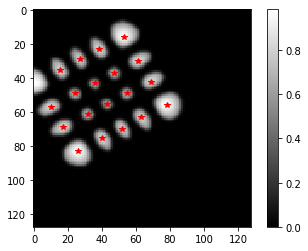

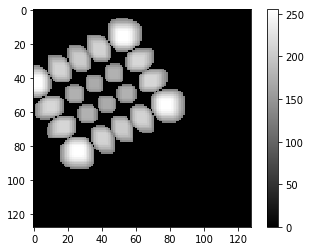

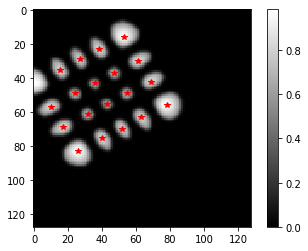

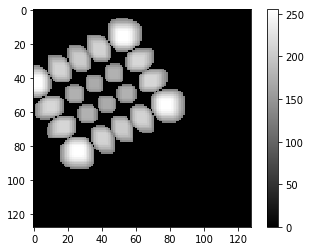

  0%|          | 1/585 [00:00<05:32,  1.75it/s]

(4, 3)
mode:  (4, 3)
1 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_2_0_7772.png
(3, 2)


/home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/src/funcs.py:42: RuntimeWarning: divide by zero encountered in long_scalars
  Basis_vect /= float(np.sqrt(Basis_vect[0]**2. + Basis_vect[1]**2.))
/home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/src/funcs.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  return Basis_vect, slope


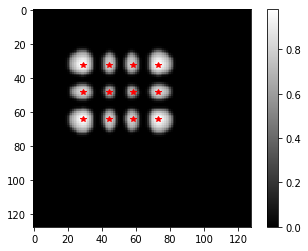

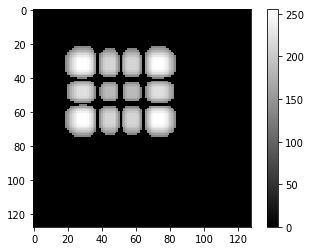

  0%|          | 2/585 [00:00<04:43,  2.06it/s]

mode:  (3, 2)
2 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_4_0_7291.png
(1, 4)


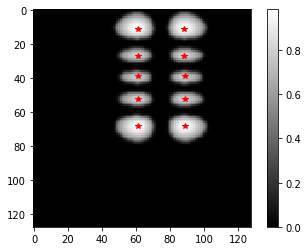

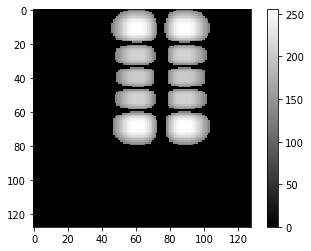

  1%|          | 3/585 [00:01<04:07,  2.35it/s]

mode:  (1, 4)
3 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_4_0_2502.png
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(14)
(2, 3)
Number of peaks (12)         inferred from mode does not match with actual number of peaks(14)
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(14)
(2, 4)


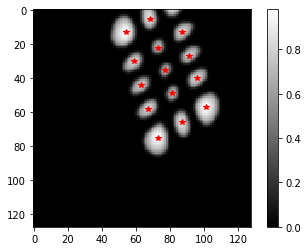

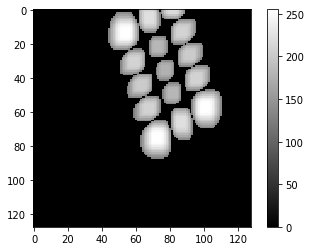

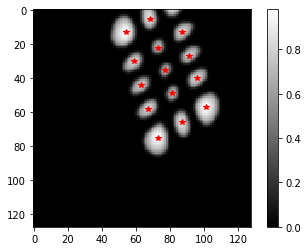

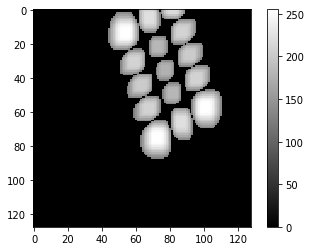

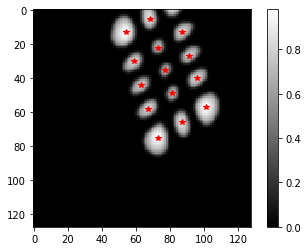

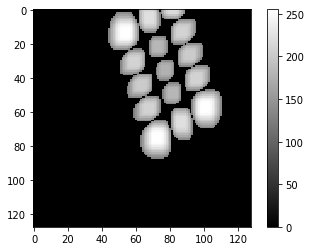

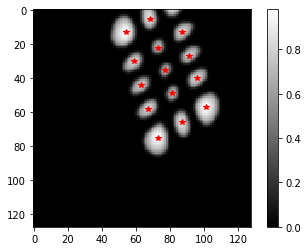

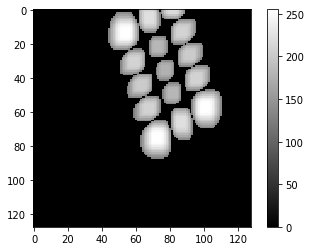

  1%|          | 4/585 [00:02<06:24,  1.51it/s]

(2, 4)
(2, 4)
(2, 4)
mode:  (2, 4)
4 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_4_0_7212.png
(1, 3)
Number of peaks (8)         inferred from mode does not match with actual number of peaks(9)
(0, 4)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(9)
(0, 4)
Number of peaks (5)         inferred from mode does not match with actual number of peaks(9)
(1, 4)


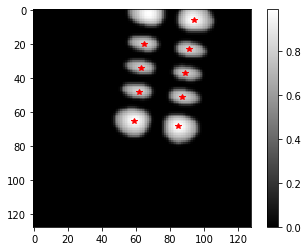

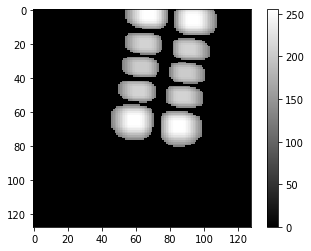

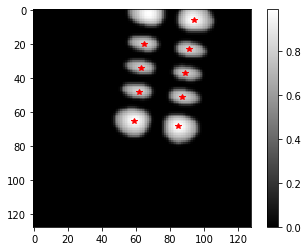

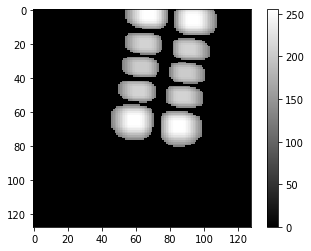

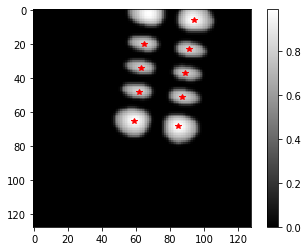

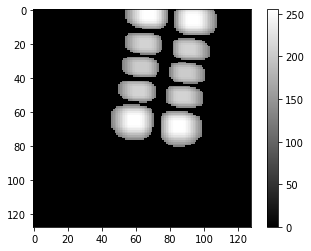

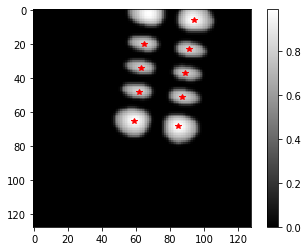

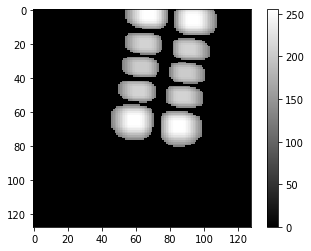

  1%|          | 5/585 [00:03<07:49,  1.23it/s]

(1, 4)
(1, 4)
(1, 4)
mode:  (1, 4)
5 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_2_0_2557.png
(2, 2)


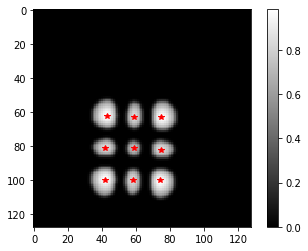

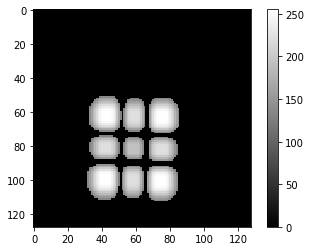

  1%|          | 6/585 [00:03<06:23,  1.51it/s]

mode:  (2, 2)
6 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_7660.png
(4, 4)


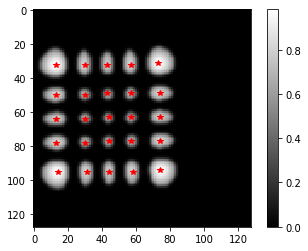

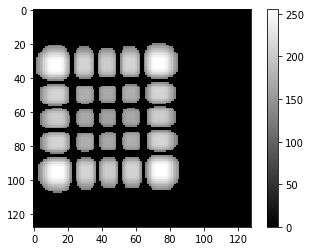

  1%|          | 7/585 [00:04<05:17,  1.82it/s]

mode:  (4, 4)
7 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_2_0_3593.png
(4, 1)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(14)
(4, 2)


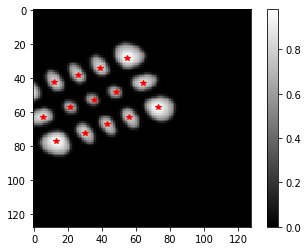

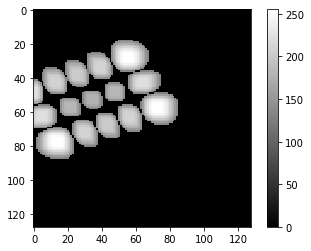

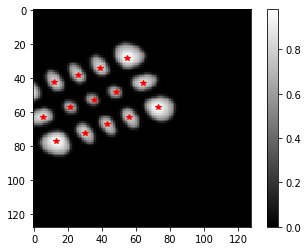

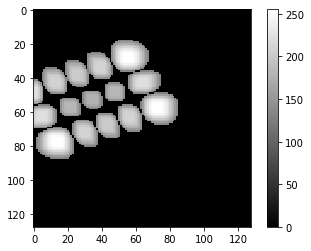

  1%|▏         | 8/585 [00:04<05:20,  1.80it/s]

(4, 2)
mode:  (4, 2)
8 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_4_0_7621.png
(2, 4)


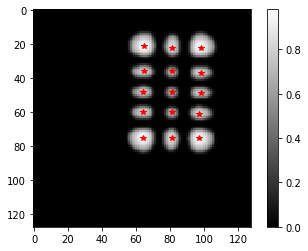

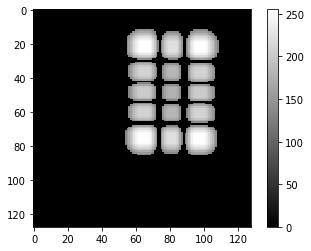

  2%|▏         | 9/585 [00:04<04:34,  2.10it/s]

mode:  (2, 4)
9 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_8582.png
(3, 4)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(24)
(4, 3)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(24)
(3, 4)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(24)
(4, 4)


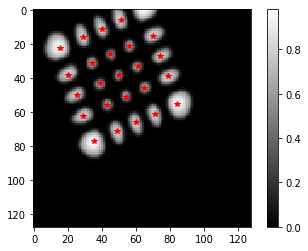

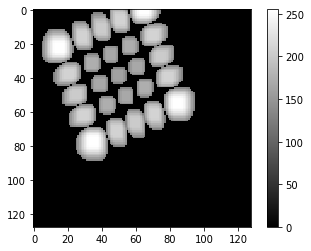

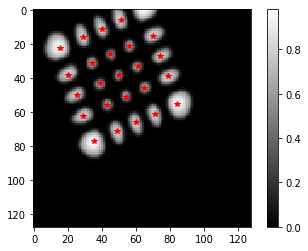

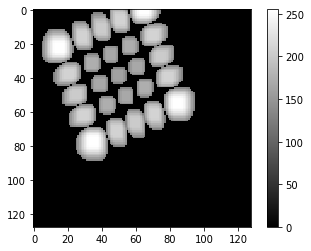

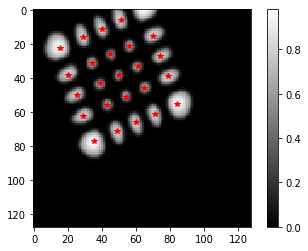

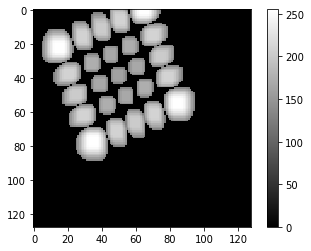

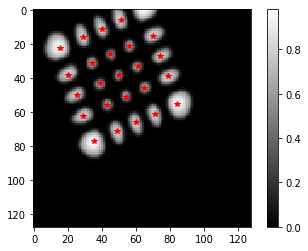

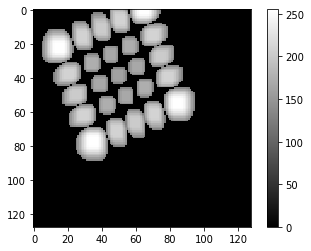

  2%|▏         | 10/585 [00:06<06:36,  1.45it/s]

(4, 4)
(4, 4)
(4, 4)
mode:  (4, 4)
10 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_1_0_1887.png
(4, 1)


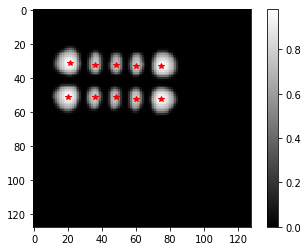

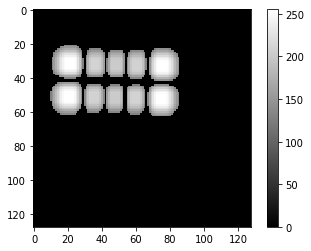

  2%|▏         | 11/585 [00:06<05:24,  1.77it/s]

mode:  (4, 1)
11 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_2794.png
(4, 3)


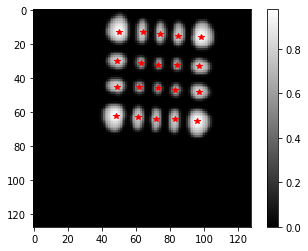

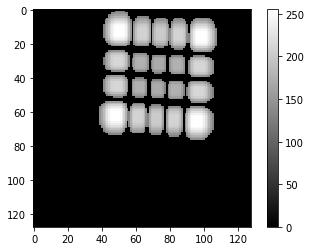

  2%|▏         | 12/585 [00:06<04:40,  2.04it/s]

mode:  (4, 3)
12 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_4_0_1182.png
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(14)
(2, 3)
Number of peaks (12)         inferred from mode does not match with actual number of peaks(14)
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(14)
(2, 4)


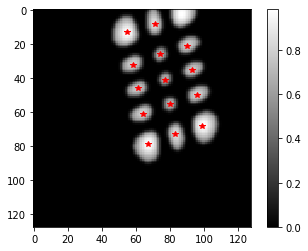

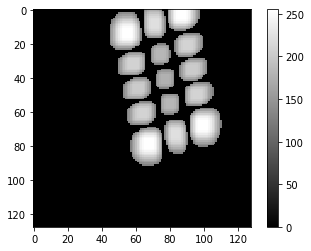

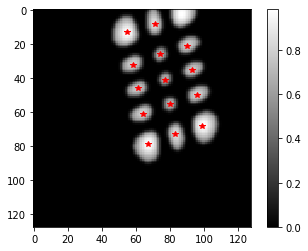

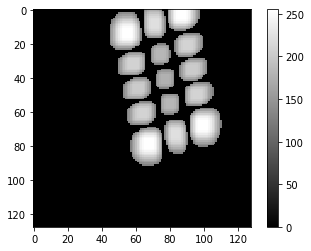

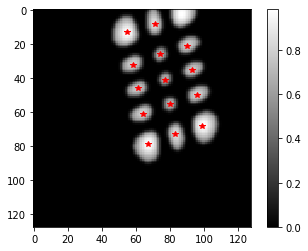

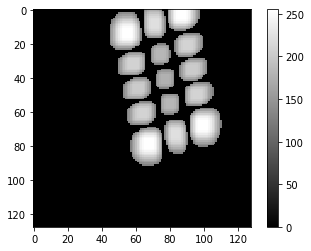

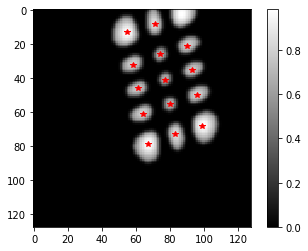

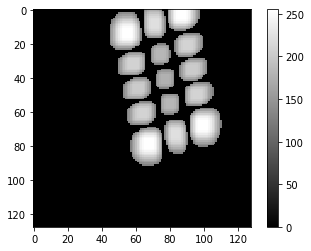

  2%|▏         | 13/585 [00:07<06:38,  1.43it/s]

(2, 4)
(2, 4)
(2, 4)
mode:  (2, 4)
13 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_6425.png
(4, 4)


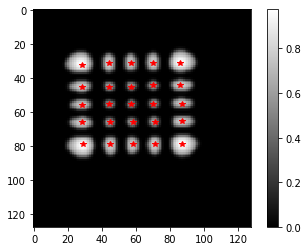

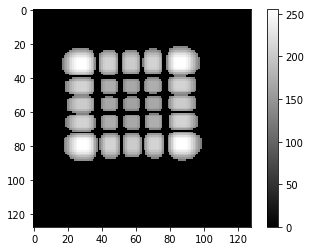

  2%|▏         | 14/585 [00:08<05:26,  1.75it/s]

mode:  (4, 4)
14 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_3_0_2762.png
(3, 3)


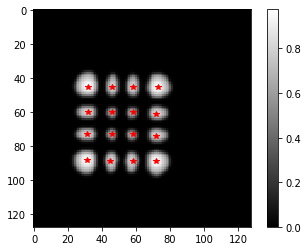

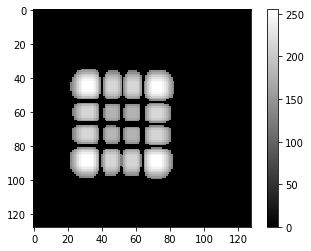

  3%|▎         | 15/585 [00:08<04:35,  2.07it/s]

mode:  (3, 3)
15 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_3821.png
(4, 4)


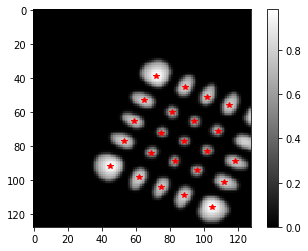

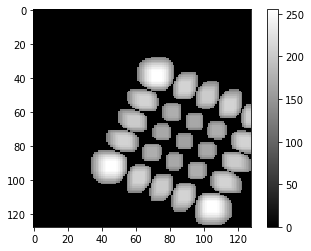

  3%|▎         | 16/585 [00:08<04:00,  2.37it/s]

mode:  (4, 4)
16 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_4_0_3375.png
(4, 4)


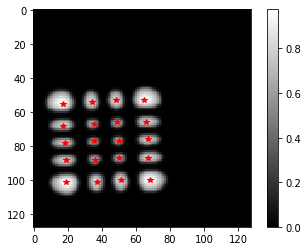

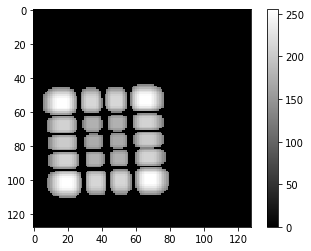

  3%|▎         | 17/585 [00:09<03:42,  2.56it/s]

mode:  (4, 4)
17 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_6511.png
(3, 4)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(23)
(4, 2)
Number of peaks (15)         inferred from mode does not match with actual number of peaks(23)
(3, 4)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(23)
(3, 4)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(23)


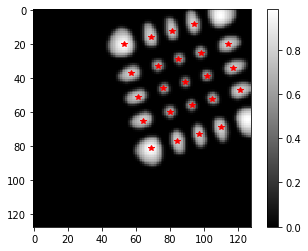

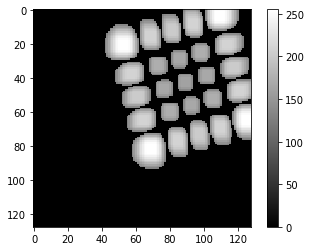

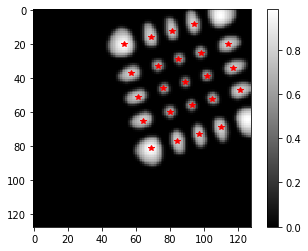

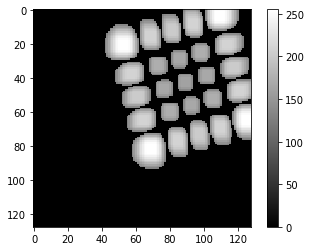

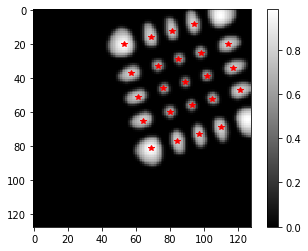

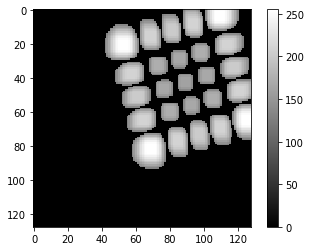

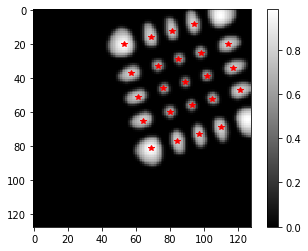

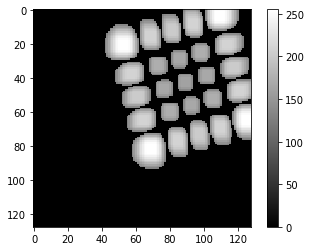

  3%|▎         | 18/585 [00:10<05:49,  1.62it/s]

(3, 4)
(3, 4)
(3, 4)
mode:  (3, 4)
18 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_9352.png
(4, 3)


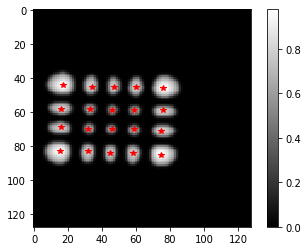

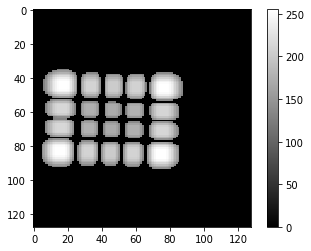

  3%|▎         | 19/585 [00:10<04:52,  1.94it/s]

mode:  (4, 3)
19 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_2_0_4086.png
(4, 2)


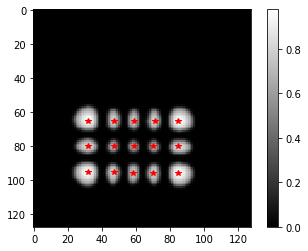

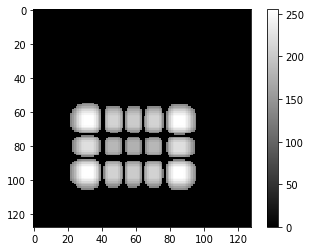

  3%|▎         | 20/585 [00:10<04:19,  2.17it/s]

mode:  (4, 2)
20 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_4199.png
(4, 3)


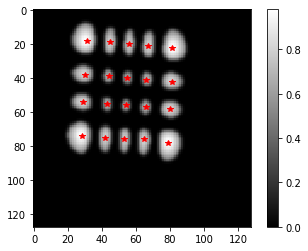

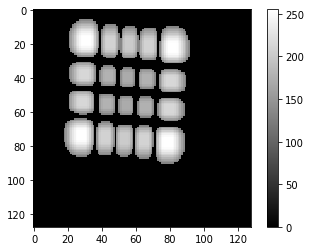

  4%|▎         | 21/585 [00:11<03:50,  2.45it/s]

mode:  (4, 3)
21 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_2_0_1823.png
(4, 2)


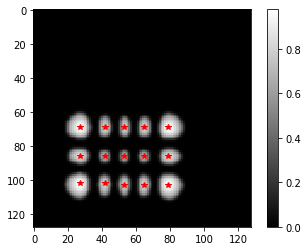

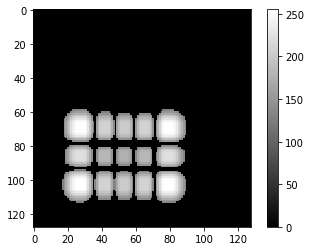

  4%|▍         | 22/585 [00:11<03:28,  2.70it/s]

mode:  (4, 2)
22 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_4_0_3453.png
(4, 4)


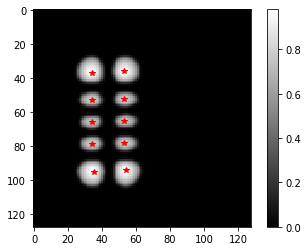

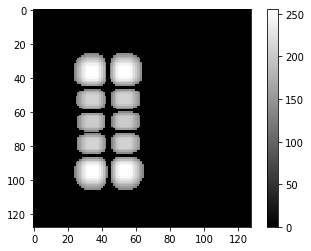

  4%|▍         | 23/585 [00:11<03:12,  2.92it/s]

mode:  (4, 4)
23 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_4_0_9017.png
(3, 4)


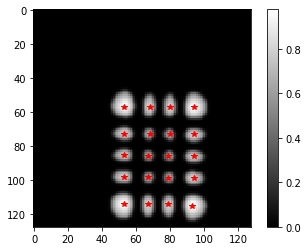

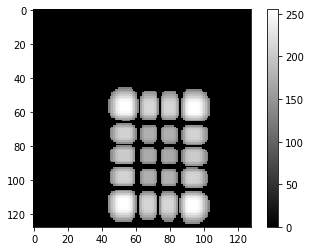

  4%|▍         | 24/585 [00:11<03:01,  3.09it/s]

mode:  (3, 4)
24 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_2_0_1608.png
(1, 2)


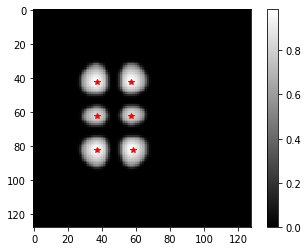

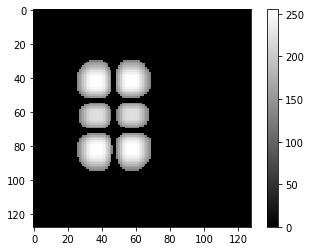

  4%|▍         | 25/585 [00:12<02:53,  3.23it/s]

mode:  (1, 2)
25 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_4_0_2731.png
(4, 4)


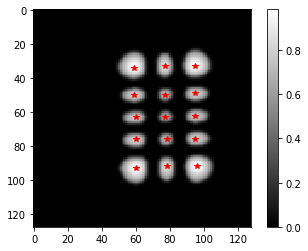

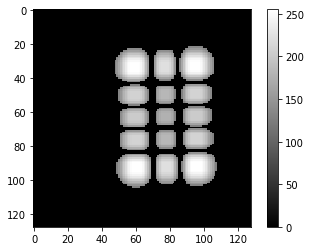

  4%|▍         | 26/585 [00:12<02:54,  3.21it/s]

mode:  (4, 4)
26 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_3_0_8753.png
(2, 3)


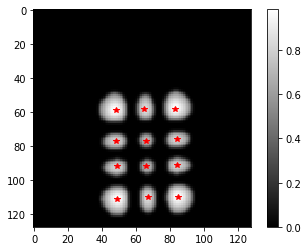

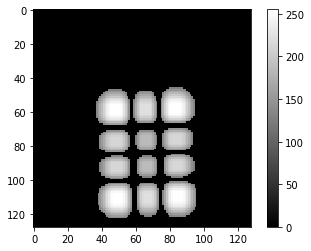

  5%|▍         | 27/585 [00:12<02:48,  3.31it/s]

mode:  (2, 3)
27 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_3429.png
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(19)
(4, 2)
Number of peaks (15)         inferred from mode does not match with actual number of peaks(19)
(3, 5)


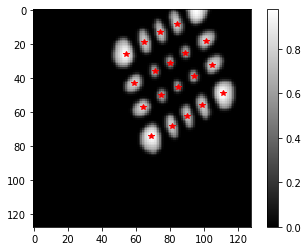

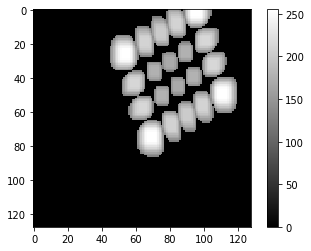

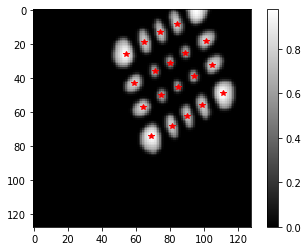

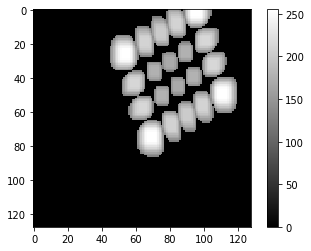

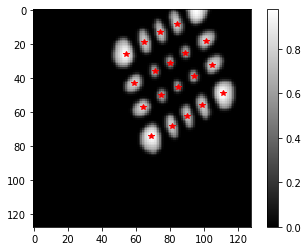

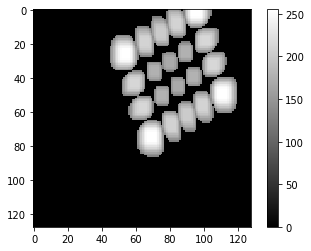

  5%|▍         | 28/585 [00:13<04:18,  2.15it/s]

(3, 5)
(3, 5)
mode:  (3, 5)
28 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_4_0_5823.png
(3, 4)


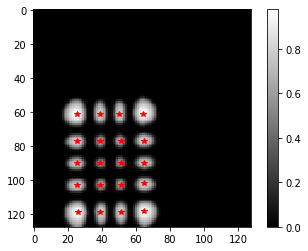

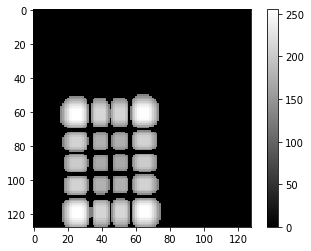

  5%|▍         | 29/585 [00:13<03:47,  2.45it/s]

mode:  (3, 4)
29 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_3_0_7806.png
(1, 3)
Number of peaks (8)         inferred from mode does not match with actual number of peaks(11)
(2, 2)
Number of peaks (9)         inferred from mode does not match with actual number of peaks(11)
(1, 3)
Number of peaks (8)         inferred from mode does not match with actual number of peaks(11)
(2, 3)


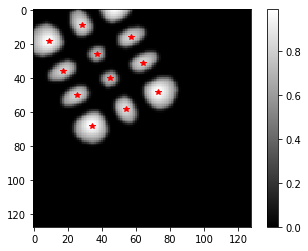

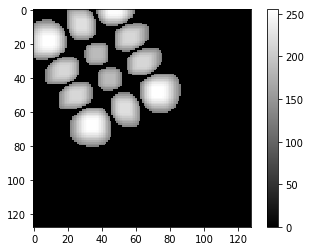

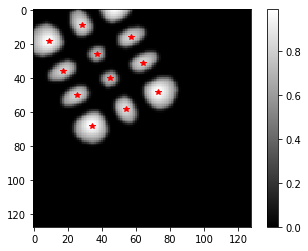

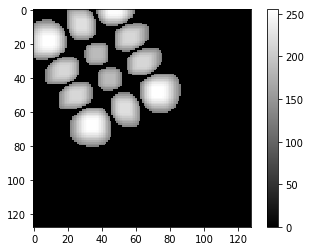

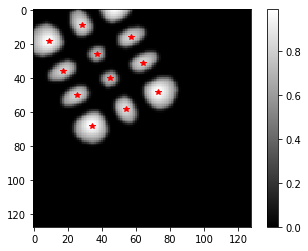

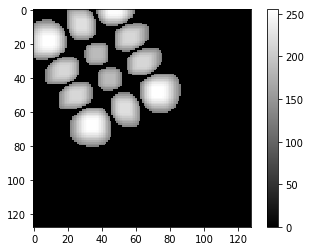

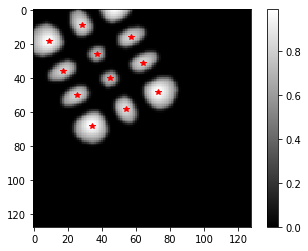

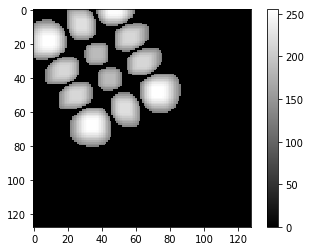

  5%|▌         | 30/585 [00:15<05:49,  1.59it/s]

(2, 3)
(2, 3)
(2, 3)
mode:  (2, 3)
30 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_4_0_1933.png
(3, 4)


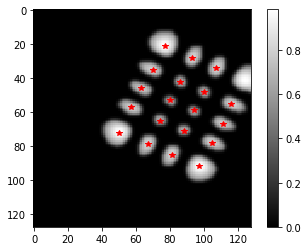

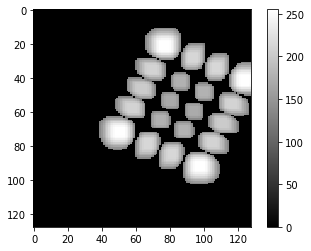

  5%|▌         | 31/585 [00:15<04:50,  1.90it/s]

mode:  (3, 4)
31 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_2_0_286.png
(3, 2)


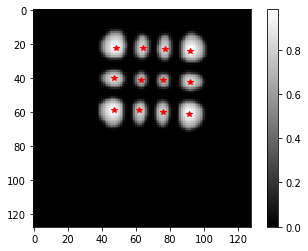

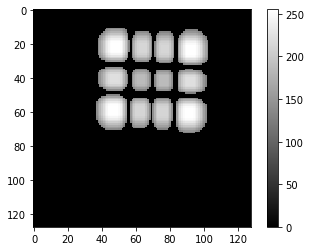

  5%|▌         | 32/585 [00:15<04:08,  2.22it/s]

mode:  (3, 2)
32 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_5807.png
(4, 3)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(22)
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(22)
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(22)
(4, 4)


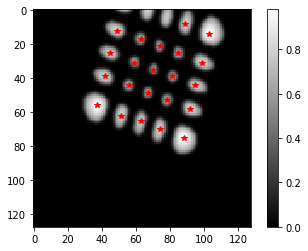

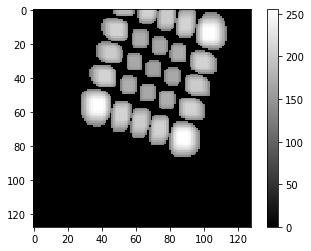

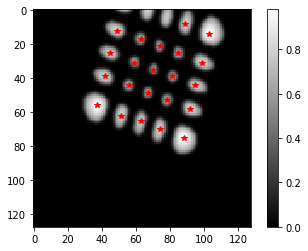

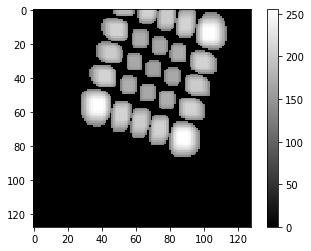

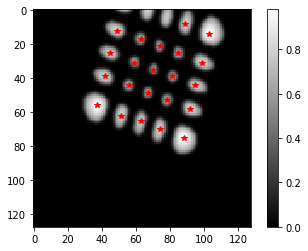

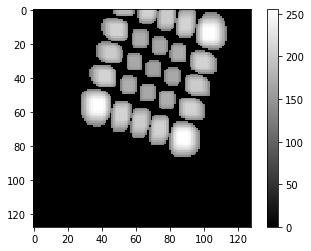

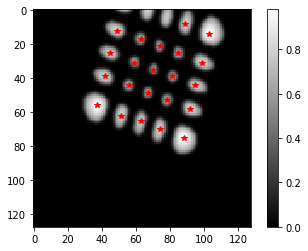

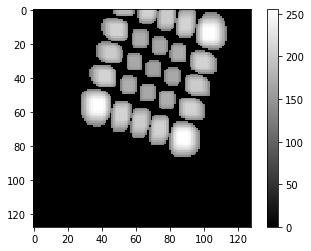

  6%|▌         | 33/585 [00:16<06:04,  1.52it/s]

(4, 4)
(4, 4)
(4, 4)
mode:  (4, 4)
33 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_2621.png
(4, 1)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(18)
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(18)
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(18)
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(18)


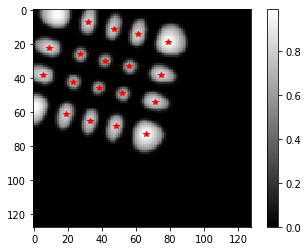

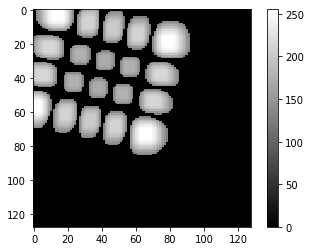

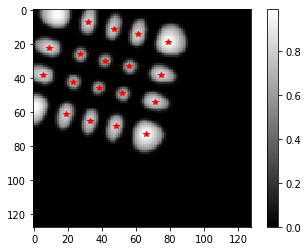

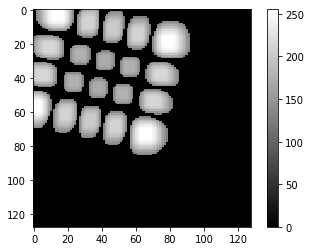

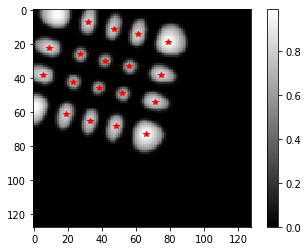

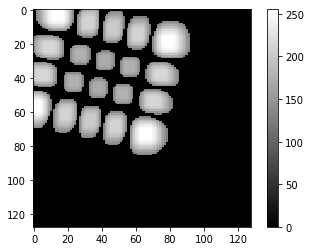

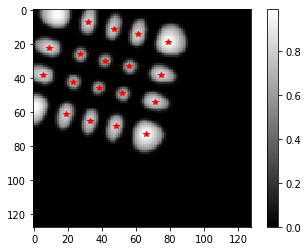

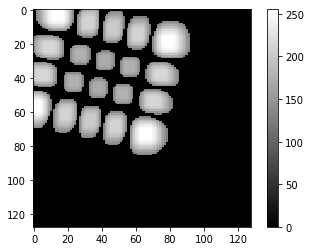

  6%|▌         | 34/585 [00:17<07:22,  1.25it/s]

(3, 3)
(3, 3)
(3, 3)
mode:  (3, 3)
34 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_4_0_3160.png
(3, 4)


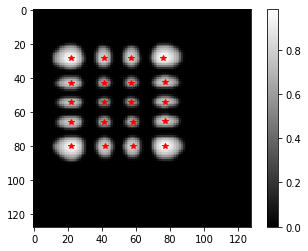

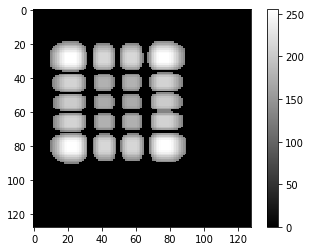

  6%|▌         | 35/585 [00:18<06:07,  1.50it/s]

mode:  (3, 4)
35 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_3_0_1550.png
(3, 3)


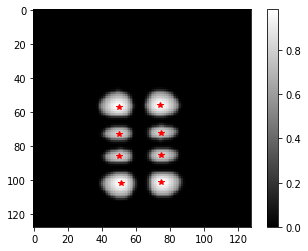

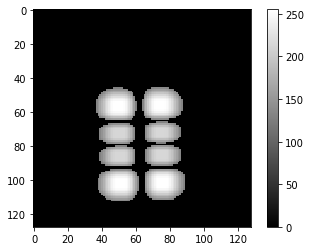

  6%|▌         | 36/585 [00:18<05:05,  1.80it/s]

mode:  (3, 3)
36 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_4_0_4334.png
(2, 4)


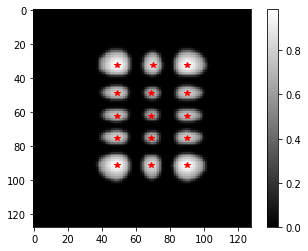

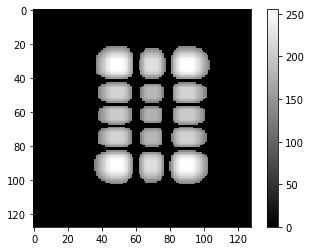

  6%|▋         | 37/585 [00:18<04:18,  2.12it/s]

mode:  (2, 4)
37 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_4_0_6829.png
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(19)
(2, 4)
Number of peaks (15)         inferred from mode does not match with actual number of peaks(19)
(2, 4)
Number of peaks (15)         inferred from mode does not match with actual number of peaks(19)
(3, 4)


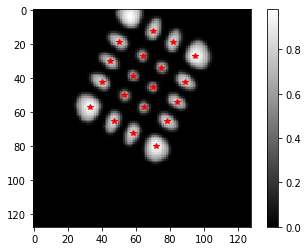

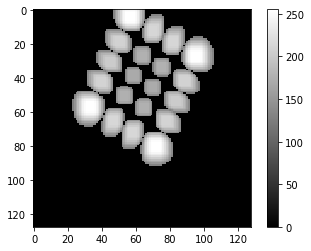

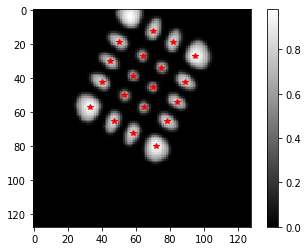

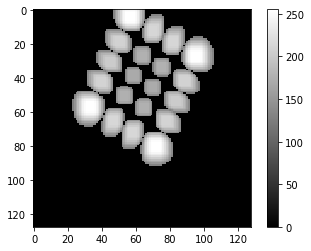

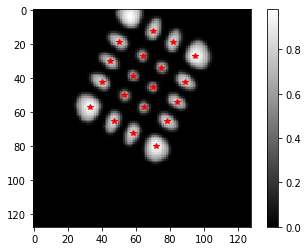

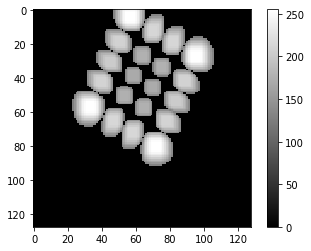

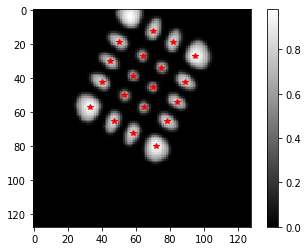

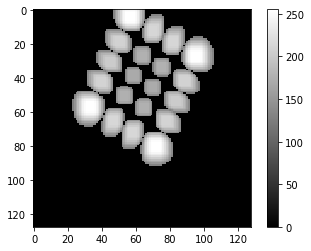

  6%|▋         | 38/585 [00:20<06:18,  1.45it/s]

(3, 4)
(3, 4)
(3, 4)
mode:  (3, 4)
38 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_1_0_7456.png
(4, 1)


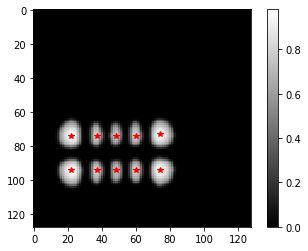

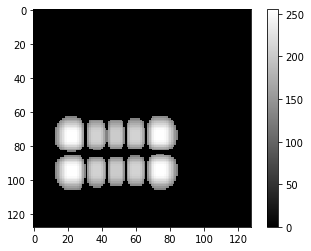

  7%|▋         | 39/585 [00:20<05:10,  1.76it/s]

mode:  (4, 1)
39 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_4842.png
(4, 3)


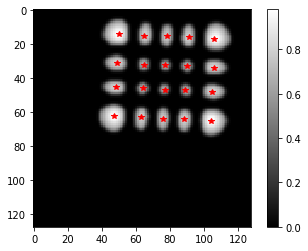

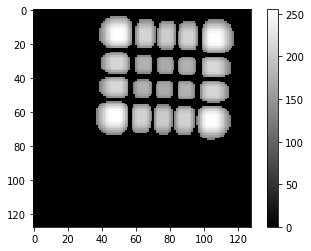

  7%|▋         | 40/585 [00:20<04:23,  2.07it/s]

mode:  (4, 3)
40 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_9280.png
(4, 4)


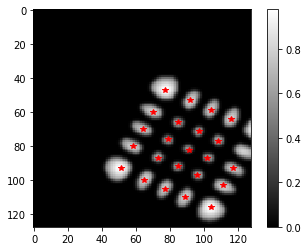

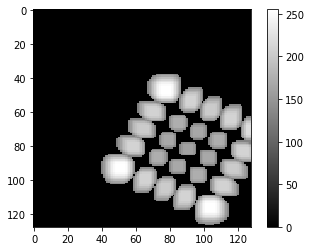

  7%|▋         | 41/585 [00:20<03:49,  2.37it/s]

mode:  (4, 4)
41 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_3_0_5282.png
(3, 2)
Number of peaks (12)         inferred from mode does not match with actual number of peaks(15)
(3, 3)


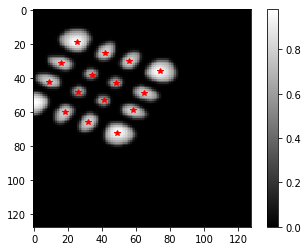

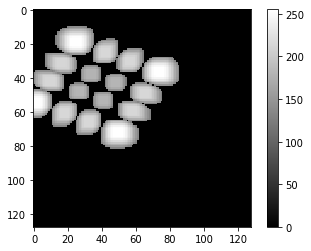

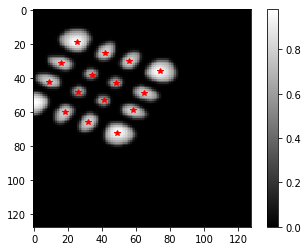

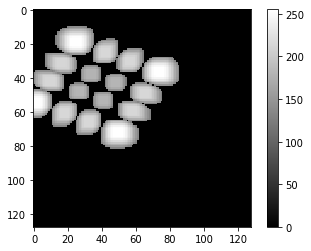

  7%|▋         | 42/585 [00:21<04:11,  2.16it/s]

(3, 3)
mode:  (3, 3)
42 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_1382.png
(4, 3)


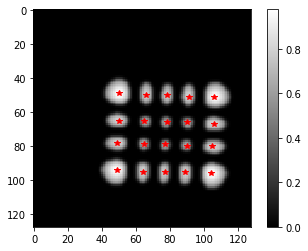

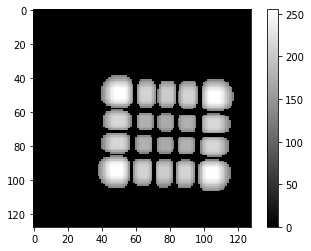

  7%|▋         | 43/585 [00:21<03:49,  2.36it/s]

mode:  (4, 3)
43 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_2_0_2726.png
(2, 2)


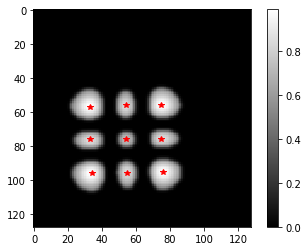

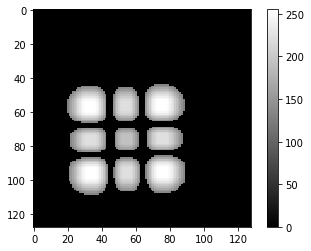

  8%|▊         | 44/585 [00:22<03:26,  2.63it/s]

mode:  (2, 2)
44 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_3_0_7965.png
(3, 3)


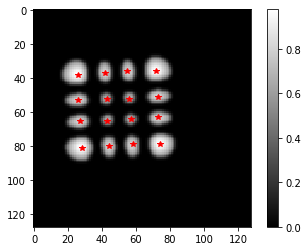

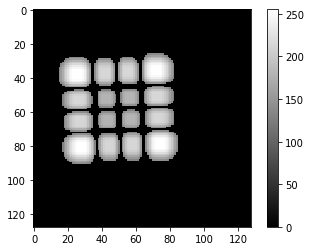

  8%|▊         | 45/585 [00:22<03:11,  2.83it/s]

mode:  (3, 3)
45 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_7460.png
(4, 4)


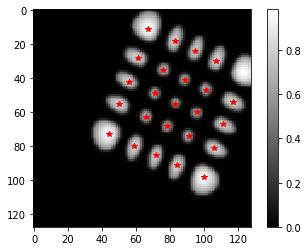

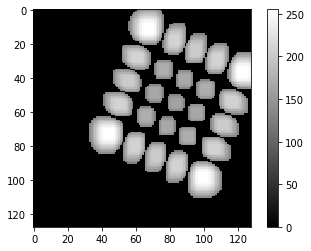

  8%|▊         | 46/585 [00:22<03:00,  2.98it/s]

mode:  (4, 4)
46 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_6903.png
(4, 4)


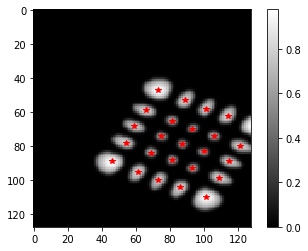

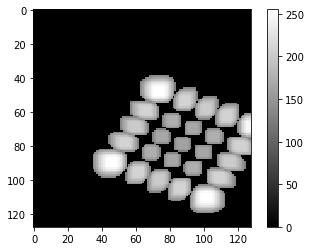

  8%|▊         | 47/585 [00:22<02:52,  3.11it/s]

mode:  (4, 4)
47 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_4_0_8906.png
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(18)
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(18)
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(18)
(3, 3)
Number of peaks (16)         inferred from mode does not match with actual number of peaks(18)


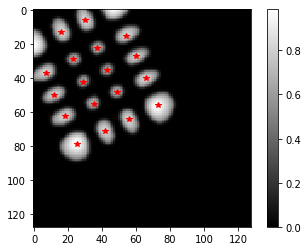

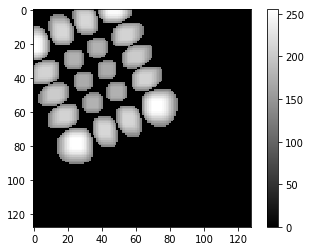

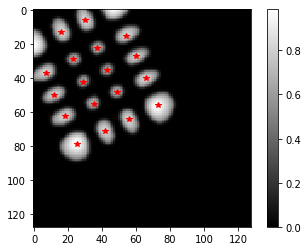

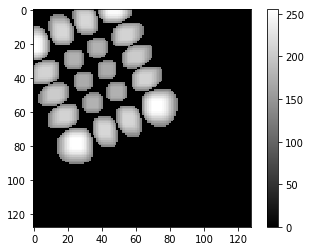

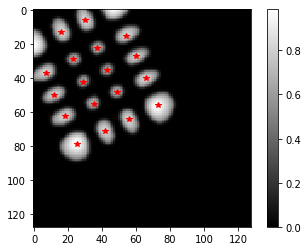

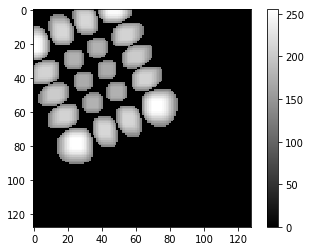

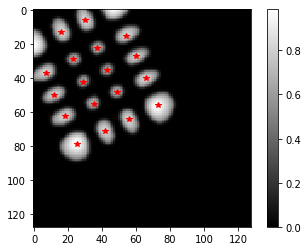

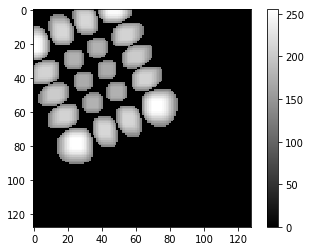

  8%|▊         | 48/585 [00:24<05:14,  1.71it/s]

(3, 3)
(3, 3)
(3, 3)
mode:  (3, 3)
48 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_3_2_0_1324.png
(3, 2)


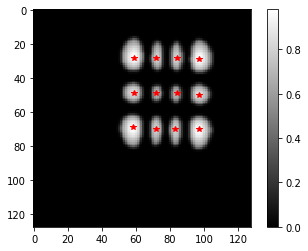

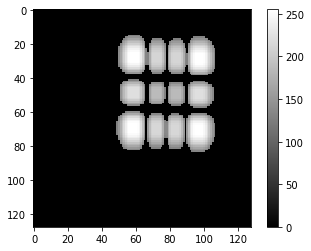

  8%|▊         | 49/585 [00:24<04:27,  2.00it/s]

mode:  (3, 2)
49 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_4259.png
(4, 3)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(22)
(4, 3)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(22)
(1, 4)
Number of peaks (10)         inferred from mode does not match with actual number of peaks(22)
(4, 3)
Number of peaks (20)         inferred from mode does not match with actual number of peaks(22)


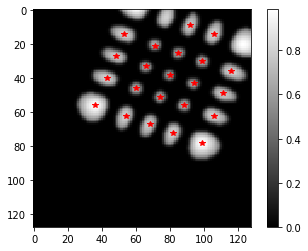

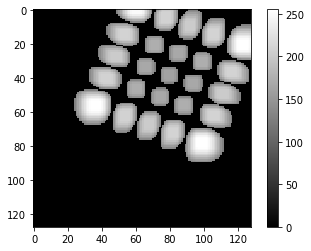

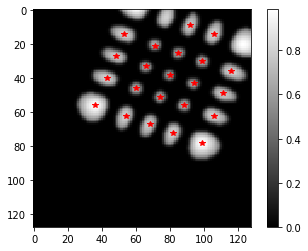

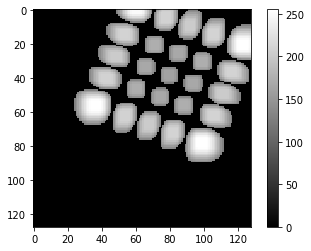

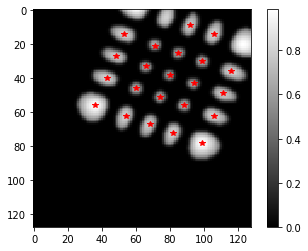

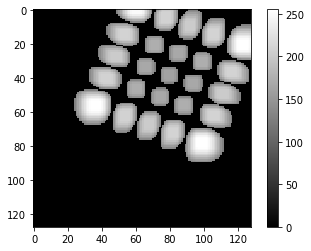

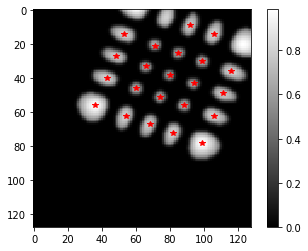

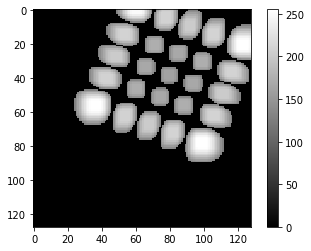

  9%|▊         | 50/585 [00:25<06:18,  1.41it/s]

(4, 3)
(4, 3)
(4, 3)
mode:  (4, 3)
50 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_3_0_2013.png
(4, 3)


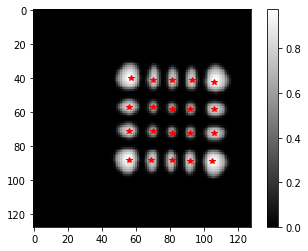

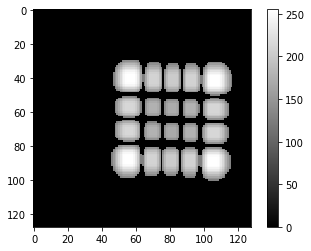

  9%|▊         | 51/585 [00:25<05:09,  1.73it/s]

mode:  (4, 3)
51 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_3447.png
(5, 2)
Number of peaks (18)         inferred from mode does not match with actual number of peaks(23)
(4, 4)


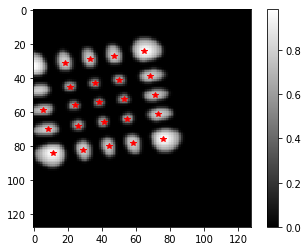

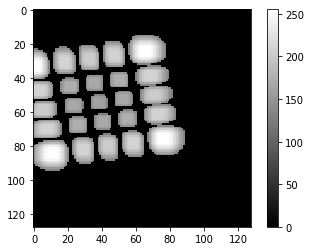

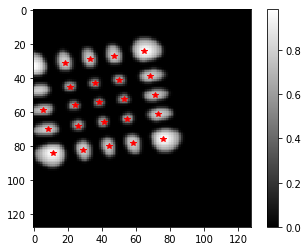

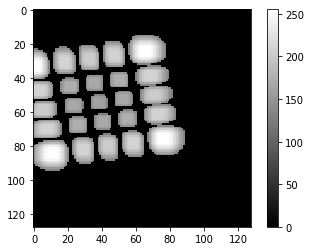

  9%|▉         | 52/585 [00:26<05:05,  1.74it/s]

(4, 4)
mode:  (4, 4)
52 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_0_0_9774.png
(3, 0)


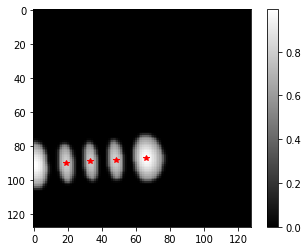

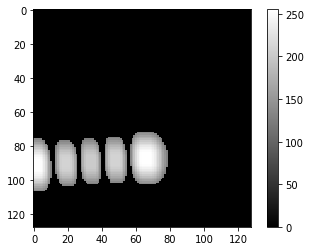

  9%|▉         | 53/585 [00:26<04:17,  2.06it/s]

mode:  (3, 0)
53 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_3_0_1780.png
(1, 3)


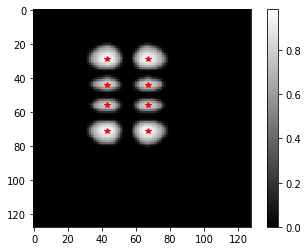

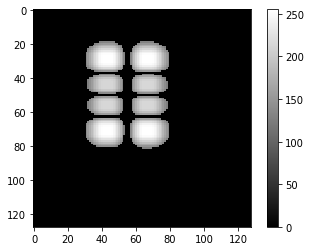

  9%|▉         | 54/585 [00:27<03:52,  2.28it/s]

mode:  (1, 3)
54 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_4_4_0_9743.png
(4, 4)


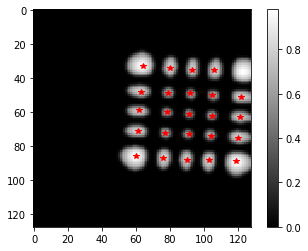

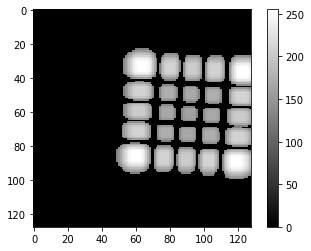

  9%|▉         | 55/585 [00:27<03:29,  2.53it/s]

mode:  (4, 4)
55 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_4_0_2388.png
(1, 4)


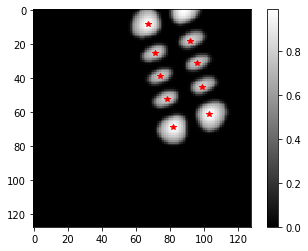

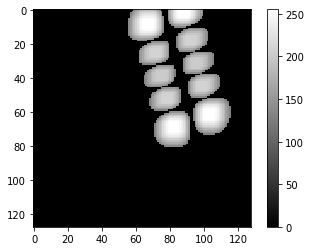

 10%|▉         | 56/585 [00:27<03:15,  2.70it/s]

mode:  (1, 4)
56 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_3_0_740.png
(2, 3)


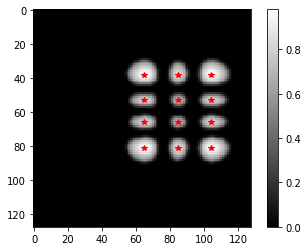

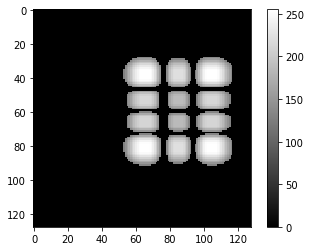

 10%|▉         | 57/585 [00:28<03:02,  2.90it/s]

mode:  (2, 3)
57 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_1_2_0_8991.png
(1, 2)


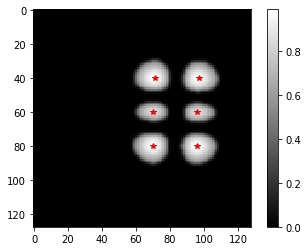

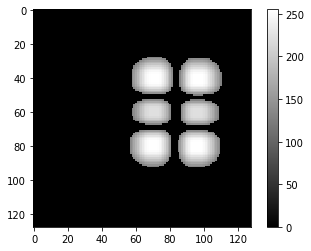

 10%|▉         | 58/585 [00:28<02:53,  3.04it/s]

mode:  (1, 2)
58 /home/shreejit/Dropbox/Academic/WORK/Beam_auto_alignment/Data/TrainingData/HG_2_4_0_4999.png


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [16]:
i = 0
for loc in tqdm(np.array(Image_Locations)[ii]):
    print(i, loc)
    md = Find_mode(loc, separation1=5, Show_ada_thresh=True)
    print('mode: ', md)
    i += 1

In [ ]:
Find_mode(loc, separation=1, Sigma=0.5, Width=10, thresh=0.5, Show_ada_thresh=True, 
          Show_fig=True, corner=0, show_peaks=False)

## Confusion Matrix

In [ ]:
# Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to 
# return the column
# label of the maximum value thus creating a categorical variable
# Basically, flipping a dummy variable back to it's categorical variable

categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(test_predict).idxmax(axis=1)

cm = confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
def plot_confusion_matrix(cm, classes,
    normalize=True,
    title='Confusion matrix',
    cmap=plt.cm.Blues, colrbar=False, savefig=True):
    
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
    else:
     print('Confusion matrix, without normalization')
    # Plotting
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if colrbar: plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", \
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(SaveModelFolder + 'Conf_Mat_of_' + Model_Name + '.png')

# Plot Confusion Mat
plot_confusion_matrix(cm, \
                        np.char.replace(Encoder['label_enc'].\
                        inverse_transform((np.arange(len(np.unique(np.array(Labels)))))), '_', ''))